In [1]:
# Importing dependencies
import pandas as pd
import numpy as np
import dask.bag as db
import json
 
# Opening JSON file
f = open('golden_json_with_full_abstract_and_titles_and_isOpenAccess.json')

docs = json.load(f)

ModuleNotFoundError: No module named 'dask'

In [2]:
df = pd.DataFrame(docs)
df.head()

,paper,mag,venue_mag,author,reference,title,abstract,petalID,doi,venue,level1,level2,level3,url,isBiomimicry,fullDocLink,isOpenAccess,abstract_full,title_full
0,2103410568,"['bubble nest', 'nest', 'mixing', 'bubble', 'p...",['Biology Letters'],"[2346835213, 2098042950]","[2130285640, 2066345165, 2054319467, 204771406...","['building', 'home', 'foam', 'tungara', 'frog'...","['frogs', 'build', 'foam', 'nests', 'floating'...",0,10.1098/RSBL.2009.0934,"[""Weird Nature: An Astonishing Exploration of ...","['physically_assemble/disassemble', 'protect_f...","['physically_assemble_structure', 'protect_fro...","['protect_from_animals', 'protect_from_loss_of...",https://royalsocietypublishing.org/doi/10.1098...,Y,https://royalsocietypublishing.org/doi/10.1098...,True,Frogs that build foam nests floating on water ...,Building a home from foam—túngara frog foam ne...
1,2138292607,"['sunset', 'earth s magnetic field', 'compass'...",['Proceedings of the National Academy of Scien...,"[2132083079, 2425702268, 2552946098]","[1493129647, 2037761037, 1984592609, 213699427...","['nocturnal', 'mammal', 'greater', 'mouse', 'e...","['evidence', 'suggests', 'bats', 'detect', 'ge...",1,10.1073/PNAS.0912477107,['Proceedings of the National Academy of Scien...,['sense_send_or_process_information'],['sense_signals/environmental_cues'],['sense_spatial_awareness/balance/orientation'],https://www.pnas.org/content/107/15/6941,Y,https://www.pnas.org/content/107/15/6941.full.pdf,True,Recent evidence suggests that bats can detect ...,"A nocturnal mammal, the greater mouse-eared ba..."
2,2005539166,"['sepia mestus', 'optomotor response', 'cuttle...",['The Journal of Experimental Biology'],"[2163942483, 3088803717]","[2035108601, 2155571491, 2159857711, 207521876...","['polarization', 'sensitivity', 'two', 'specie...","['existence', 'polarization', 'sensitivity', '...",2,10.1242/JEB.042937,"['The Journal of Experimental Biology', 'Curre...",['sense_send_or_process_information'],['sense_signals/environmental_cues'],"['sense_light_in_the_non-visible_spectrum', 's...",https://jeb.biologists.org/content/213/19/3364,Y,https://journals.biologists.com/jeb/article-pd...,True,SUMMARY The existence of polarization sensitiv...,Polarization sensitivity in two species of cut...
3,2151557512,"['energy source', 'cellulase', 'archaea', 'cel...",['Nature Communications'],"[3146712807, 3146712807, 2189911855, 265906908...","[2141885858, 2120772351, 2108929776, 212024499...","['identification', 'characterization', 'multid...","['archaea', 'microorganisms', 'wide', 'range',...",3,10.1038/NCOMMS1373,['Nature Communications'],"['chemically_modify_or_change_energy_state', '...","['chemically_break_down', 'protect_from_non-li...","['chemically_break_down_organic_compounds', 'p...",https://www.nature.com/articles/ncomms1373,Y,https://www.nature.com/articles/ncomms1373.pdf,True,Despite extensive studies on microbial and enz...,Identification and characterization of a multi...
4,2160542693,"['galactan', 'coralline algae', 'cell wall', '...",['Journal of Phycology'],"[1790079306, 2557664461, 189902495, 2140516860]","[2001396309, 2057007315, 1968834637, 212515227...","['differences', 'polysaccharide', 'structure',...","['articulated', 'coralline', 'calliarthron', '...",4,10.1111/J.1529-8817.2010.00828.X,"['The Journal of Experimental Biology', 'Natur...",['maintain_structural_integrity'],['manage_structural_forces'],"['manage_shear', 'manage_stress/strain']",https://onlinelibrary.wiley.com/doi/abs/10.111...,Y,,False,The articulated coralline Calliarthron cheilos...,DIFFERENCES IN POLYSACCHARIDE STRUCTURE BETWEE...


## Pre-Processing

In [3]:
df = df[df['isBiomimicry'] == 'Y']
df.count()

paper            1456
mag              1456
venue_mag        1456
author           1456
reference        1456
title            1456
abstract         1456
petalID          1456
doi              1456
venue            1456
level1           1456
level2           1456
level3           1456
url              1456
isBiomimicry     1456
fullDocLink      1456
isOpenAccess     1456
abstract_full    1438
title_full       1456
dtype: int64

In [4]:
df = df[df['level1'] != '[]' ]
df.count()

paper            1131
mag              1131
venue_mag        1131
author           1131
reference        1131
title            1131
abstract         1131
petalID          1131
doi              1131
venue            1131
level1           1131
level2           1131
level3           1131
url              1131
isBiomimicry     1131
fullDocLink      1131
isOpenAccess     1131
abstract_full    1113
title_full       1131
dtype: int64

In [5]:
df_cleaned = df[['abstract_full', 'title_full', 'level1']]
df_cleaned.head()

,abstract_full,title_full,level1
0,Frogs that build foam nests floating on water ...,Building a home from foam—túngara frog foam ne...,"['physically_assemble/disassemble', 'protect_f..."
1,Recent evidence suggests that bats can detect ...,"A nocturnal mammal, the greater mouse-eared ba...",['sense_send_or_process_information']
2,SUMMARY The existence of polarization sensitiv...,Polarization sensitivity in two species of cut...,['sense_send_or_process_information']
3,Despite extensive studies on microbial and enz...,Identification and characterization of a multi...,"['chemically_modify_or_change_energy_state', '..."
4,The articulated coralline Calliarthron cheilos...,DIFFERENCES IN POLYSACCHARIDE STRUCTURE BETWEE...,['maintain_structural_integrity']


In [6]:
df_cleaned['abstract'] = df_cleaned['title_full'] + df_cleaned['abstract_full']
df_cleaned['title'] = df_cleaned['title_full']
df_cleaned = df_cleaned[['abstract', 'title', 'level1']]
df_cleaned.head()

<ipython-input-6-3b2ff8dfb6cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['abstract'] = df_cleaned['title_full'] + df_cleaned['abstract_full']
<ipython-input-6-3b2ff8dfb6cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['title'] = df_cleaned['title_full']


,abstract,title,level1
0,Building a home from foam—túngara frog foam ne...,Building a home from foam—túngara frog foam ne...,"['physically_assemble/disassemble', 'protect_f..."
1,"A nocturnal mammal, the greater mouse-eared ba...","A nocturnal mammal, the greater mouse-eared ba...",['sense_send_or_process_information']
2,Polarization sensitivity in two species of cut...,Polarization sensitivity in two species of cut...,['sense_send_or_process_information']
3,Identification and characterization of a multi...,Identification and characterization of a multi...,"['chemically_modify_or_change_energy_state', '..."
4,DIFFERENCES IN POLYSACCHARIDE STRUCTURE BETWEE...,DIFFERENCES IN POLYSACCHARIDE STRUCTURE BETWEE...,['maintain_structural_integrity']


In [7]:
# Changing 'level1' column from string to list
for i in range(len(df_cleaned['level1'])):
    x = df_cleaned['level1'][i]
    x = x.strip('][').split(', ')
    for j in range(len(x)):
        x[j] = x[j].replace("'", "")
    df_cleaned['level1'][i] = x

In [8]:
df_cleaned.head()

,abstract,title,level1
0,Building a home from foam—túngara frog foam ne...,Building a home from foam—túngara frog foam ne...,"[physically_assemble/disassemble, protect_from..."
1,"A nocturnal mammal, the greater mouse-eared ba...","A nocturnal mammal, the greater mouse-eared ba...",[sense_send_or_process_information]
2,Polarization sensitivity in two species of cut...,Polarization sensitivity in two species of cut...,[sense_send_or_process_information]
3,Identification and characterization of a multi...,Identification and characterization of a multi...,"[chemically_modify_or_change_energy_state, pro..."
4,DIFFERENCES IN POLYSACCHARIDE STRUCTURE BETWEE...,DIFFERENCES IN POLYSACCHARIDE STRUCTURE BETWEE...,[maintain_structural_integrity]


In [9]:
# Importing dependencies
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, auc, hamming_loss
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.calibration import CalibratedClassifierCV

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aeltabak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# convert general category into label columns
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(df_cleaned.level1)

# concatenate with the abstracts
df = pd.concat([df_cleaned[['abstract', 'title']], pd.DataFrame(labels)], axis=1)
df.columns = ['abstract', 'title'] + list(mlb.classes_)
df.head()

,abstract,title,attach,change_size_or_color,chemically_modify_or_change_energy_state,maintain_ecological_community,maintain_structural_integrity,move,physically_assemble/disassemble,process_resources,protect_from_harm,sense_send_or_process_information
0,Building a home from foam—túngara frog foam ne...,Building a home from foam—túngara frog foam ne...,0,0,0,0,0,0,1,0,1,0
1,"A nocturnal mammal, the greater mouse-eared ba...","A nocturnal mammal, the greater mouse-eared ba...",0,0,0,0,0,0,0,0,0,1
2,Polarization sensitivity in two species of cut...,Polarization sensitivity in two species of cut...,0,0,0,0,0,0,0,0,0,1
3,Identification and characterization of a multi...,Identification and characterization of a multi...,0,0,1,0,0,0,0,0,1,0
4,DIFFERENCES IN POLYSACCHARIDE STRUCTURE BETWEE...,DIFFERENCES IN POLYSACCHARIDE STRUCTURE BETWEE...,0,0,0,0,1,0,0,0,0,0


In [19]:
# sample and keep columns that have at least 1 positive example
sample_df = df.sample(frac = 1, random_state = 4)
keep = sample_df.iloc[:,2:].apply(sum) > 1
sample_df = pd.concat([sample_df.iloc[:,:2],sample_df.iloc[:,2:].iloc[:,keep.values]], axis = 1)

categories = sample_df.columns[2:]

# removed categories
print('Removed following categories from training : {}'.format(str(keep[~keep].index.to_list())))

Removed following categories from training : []


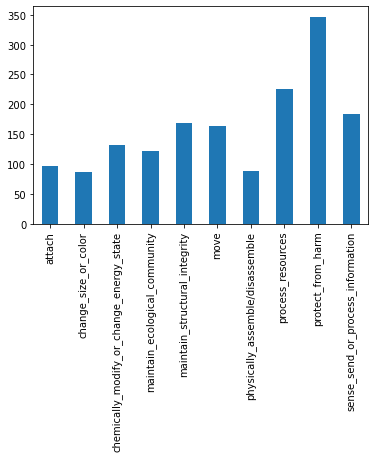

In [23]:
testing = df.loc[:, ~df.columns.isin(['abstract', 'title'])]

import matplotlib.pyplot as plt
testing.sum().plot.bar()
plt.show()

In [45]:
# split into train and test
train, test = train_test_split(sample_df, random_state=76, test_size=0.15, shuffle=True)

X_train = train.abstract
X_test = test.abstract

print(X_train.shape)
print(X_test.shape)

(961,)
(170,)


In [46]:
def feature_importance(pipeline):
    '''
    Extract feature importances from pipeline. 
    Since I am using CalibratedClassifierCV I will average the coefficients over calibrated classifiers.
    '''
    # average coefficients over all calibrated classifiers
    coef_avg = 0
    classifiers = pipeline[1].estimators_[0].calibrated_classifiers_
    for i in classifiers:
        coef_avg = coef_avg + i.base_estimator.coef_
    coef_avg  = (coef_avg/len(classifiers)).tolist()[0]
    # get feature names from tf-idf vectorizer
    features = pipeline[0].get_feature_names()
    # get 10 most important features
    top_f = pd.DataFrame(list(zip(features,coef_avg)), columns = ['token','coef']) \
        .nlargest(10,'coef').to_dict(orient = 'records')
    return top_f

In [47]:
# define the pipeline
classifier = CalibratedClassifierCV(LinearSVC()) 

# for each category train the model and get accuracy, auc
models = {}
features = {}
preds = {}
for category in categories:
    # give pipelines unique names. important!  
    SVC_pipeline = Pipeline([
                (f'tfidf_{category}', TfidfVectorizer(stop_words=stop_words)),
                (f'clf_{category}', OneVsRestClassifier(classifier, n_jobs=1)),
            ])
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train.values.astype('U'), train[category])
    models[category] = SVC_pipeline
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test.values.astype('U'))
    preds[category] = prediction
    accuracy = accuracy_score(test[category], prediction)
    # compute auc
    probas_ = SVC_pipeline.predict_proba(X_test.values.astype('U'))
    fpr, tpr, thresholds = roc_curve(test[category], probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print("Accuracy : {} . Area under the ROC curve : {}".format(round(accuracy,4), round(roc_auc,4)))
    print()
    # get most predictive features
    features[category] = feature_importance(SVC_pipeline)

... Processing attach
Accuracy : 0.9588 . Area under the ROC curve : 0.9114

... Processing change_size_or_color
Accuracy : 0.9529 . Area under the ROC curve : 0.857

... Processing chemically_modify_or_change_energy_state
Accuracy : 0.9588 . Area under the ROC curve : 0.9237

... Processing maintain_ecological_community
Accuracy : 0.9294 . Area under the ROC curve : 0.828

... Processing maintain_structural_integrity
Accuracy : 0.8824 . Area under the ROC curve : 0.903

... Processing move
Accuracy : 0.9294 . Area under the ROC curve : 0.9038

... Processing physically_assemble/disassemble
Accuracy : 0.9235 . Area under the ROC curve : 0.8274

... Processing process_resources
Accuracy : 0.9118 . Area under the ROC curve : 0.8977

... Processing protect_from_harm
Accuracy : 0.8588 . Area under the ROC curve : 0.8637

... Processing sense_send_or_process_information
Accuracy : 0.8941 . Area under the ROC curve : 0.8386



In [48]:
def predict_tags(X, labels = None):
    '''
    Predict tags for a given abstract.
    
    Args:
      - X (list): an iterable with text.
      - labels (pandas.Dataframe): label indicators for an abstract
    '''
    preds = []
    if type(X) is str: # convert into iterable if string
        X = [X]
    
    # get prediction from each model
    for c in models.keys():
        preds.append(models[c].predict(X))
    
    # print original labels if given
    if labels is not None:
        assert len(X) == 1, 'Only one extract at a time.'
        predicted_tags = [k for k,v in zip(list(models.keys()),preds) if v[0] > 0]
        original_tags = list(labels.index[labels.map(lambda x: x>0)])
        print('Original Tags: {}'.format(str(original_tags)))
        print("Predicted Tags: {}".format(str(predicted_tags)))
        
    return preds

In [49]:
# predict tags for 20 abstracts
for i in range(0,5):
    print("Title: " + test.title.iloc[i])
    predict_tags(test['abstract'].iloc[i], labels = test.iloc[i,2:])
    print()

Title: The role of granules within viscous capture threads of orb-weaving spiders
Original Tags: ['attach', 'maintain_structural_integrity']
Predicted Tags: ['attach', 'maintain_structural_integrity']

Title: Evidence that halogenated furanones from Delisea pulchra inhibit acylated homoserine lactone (AHL)-mediated gene expression by displacing the AHL signal from its receptor protein.
Original Tags: ['protect_from_harm']
Predicted Tags: ['protect_from_harm']

Title: Orange/lemon-scented beetles: opposite enantiomers of limonene as major constituents in the defensive secretion of related carabids
Original Tags: ['protect_from_harm']
Predicted Tags: ['protect_from_harm']

Title: Polyphosphoprotein-Containing Marine Adhesives
Original Tags: ['attach']
Predicted Tags: ['attach']

Title: Convergent evolution of metabolic roles in bacterial co-symbionts of insects
Original Tags: ['maintain_ecological_community']
Predicted Tags: []



In [50]:
# 10 most important features by category
features_df = pd.DataFrame(features)
features_df.apply(lambda x: [d['token'] for d in x], axis=0)

,attach,change_size_or_color,chemically_modify_or_change_energy_state,maintain_ecological_community,maintain_structural_integrity,move,physically_assemble/disassemble,process_resources,protect_from_harm,sense_send_or_process_information
0,adhesive,microtubule,pathway,ecosystem,mechanical,muscle,blades,transport,temperature,sensitivity
1,attachment,folding,gold,enac,bone,swimming,slime,networks,heat,light
2,adhesion,blades,microbial,fertilization,properties,drag,microtubule,aqp,temperatures,magnetic
3,glue,proboscis,enzyme,microtubule,wood,vortex,web,water,resistance,visual
4,proboscis,dermis,bacteria,reproductive,strength,microtubule,decorations,uptake,loss,scent
5,pads,multilayer,oil,algal,erosion,locomotion,matrix,wetlands,bacterial,colour
6,proteins,colour,energy,beaver,tissue,wake,rostrum,prey,soil,response
7,dopa,scattering,muscles,tree,stiffness,penguins,skeletons,leaf,enac,pollination
8,fertilization,humidity,enzymes,rules,wetlands,force,dopa,fog,lymphatic,sensory
9,cement,canopy,leg,ant,collagen,awn,formation,blubber,anti,hairs


In [51]:
# get all predictions
y_pred = np.array(predict_tags(test.abstract.values.astype('U'))).T

# get true labels in the same order
y_true = test[list(models.keys())].to_numpy()

In [52]:
hamming_loss(y_true,y_pred)
# fraction of labels assgined incorrectly.
# the lower the better

0.08

In [53]:
accuracy_score(y_true, y_pred)

0.4411764705882353

In [54]:
def hamming_score(y_true, y_pred, normalize=True, sample_weight=None):
    '''
    Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
    http://stackoverflow.com/q/32239577/395857
    '''
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        #print('\nset_true: {0}'.format(set_true))
        #print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

print('Hamming Score : {}'.format(hamming_score(y_true,y_pred)))

Hamming Score : 0.518235294117647
